In [94]:
#Details from the dataset 

#Education: 1 'Below College', 2 'College', 3 'Bachelor', 4 'Master', 5 'Doctor'
#EnvironmentSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'
#JobInvolvement: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'
#JobSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'
#PerformanceRating: 1 'Low', 2 'Good', 3 'Excellent', 4 'Outstanding'
#RelationshipSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'
#WorkLifeBalance: 1 'Bad', 2 'Good', 3 'Better', 4 'Best'

In [128]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [96]:
data = pd.read_csv('HR Employee Attrition.csv')

In [97]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [98]:
data=data.drop('EmployeeNumber', axis = 1)

In [99]:
data.shape

(1470, 34)

In [100]:
#checking for null values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [102]:
# variable(s) with constant value
val = data.apply(lambda x: len(x.unique()))
val[val ==1 ].index

Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')

In [103]:
data.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis = 1, inplace = True)

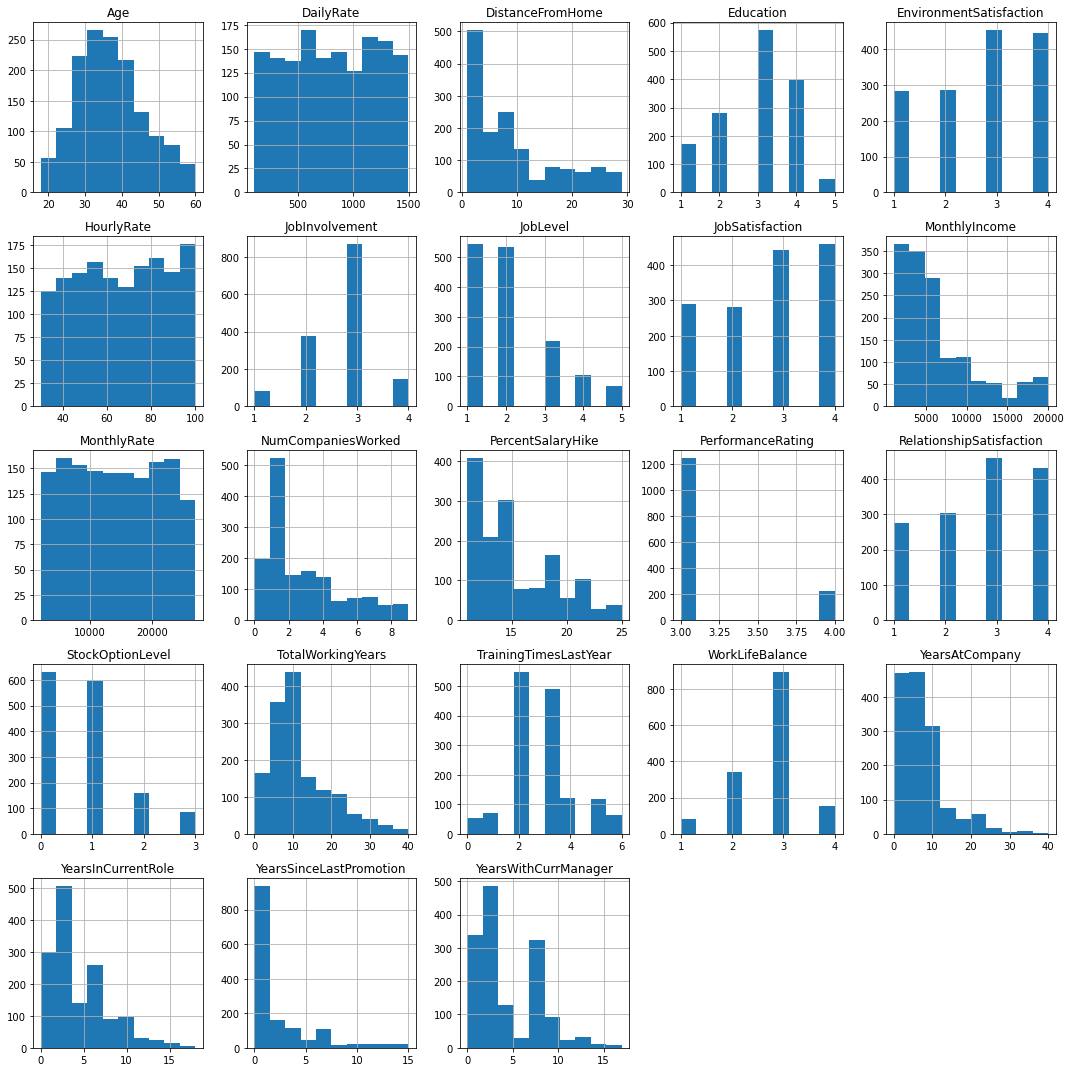

In [104]:
data.hist(figsize = (15,15))
plt.tight_layout()
plt.show()

     Following are some inferences from the histogram plots. 
Most distributions are right-skewed (Monthly Income, Total Working Years, Year at Company, Distance From Home, etc.  
The age feature is a little right-skewed, and most of the employees have ages between 25–40 years. 

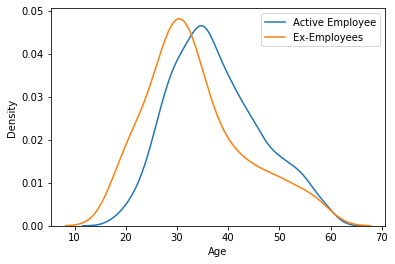

In [105]:
sns.kdeplot(data.loc[data['Attrition'] == 'No', 'Age'], label = 'Active Employee')
sns.kdeplot(data.loc[data['Attrition'] == 'Yes', 'Age'], label = 'Ex-Employees')

plt.legend()
plt.show()


Ex-employees have an average age of 30 years, while the current employees have 36 years. A younger employee is more likely to leave a company, and the education and marital status parameters are potential support.

<AxesSubplot:xlabel='Department', ylabel='count'>

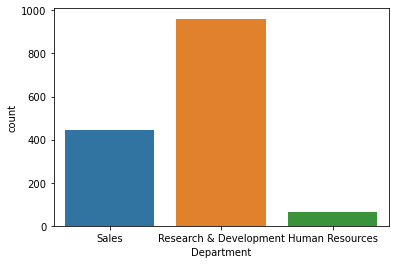

In [106]:
sns.countplot(data['Department'])

counting the number of employees in each department, we can see that Research & Development has the biggest number of employees

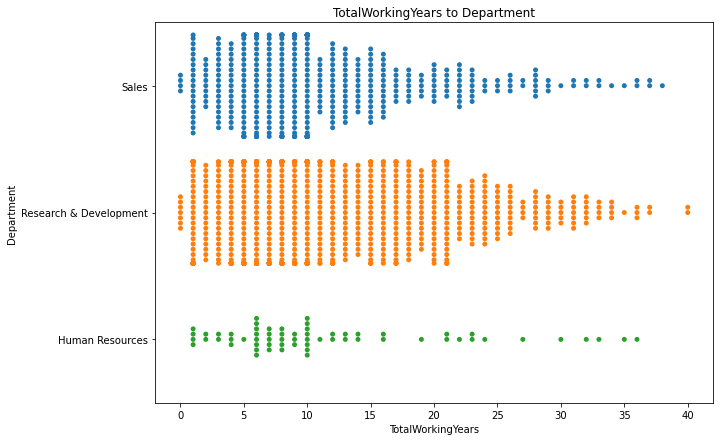

In [107]:
f, ax = plt.subplots(figsize=(10,7))
sns.swarmplot(x= data["TotalWorkingYears"], y= data["Department"]).set( title= 'TotalWorkingYears to Department')
plt.show()

Seeing the total working years for employees of each department, we can see that Research & Development also takes the lead, and the human resources has the least amount of working years for employees

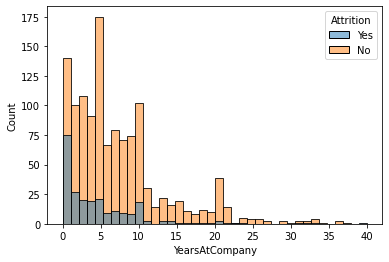

In [108]:
sns.histplot(data=data,x='YearsAtCompany',hue='Attrition')
plt.show()

Seeing the total working years for employees and the rate of attrition, we can see that the more working years the employees have, the less likely they are to leave the job. Also, employees who have worked for 1 and 10 years have the greater likelihood to leave the job..

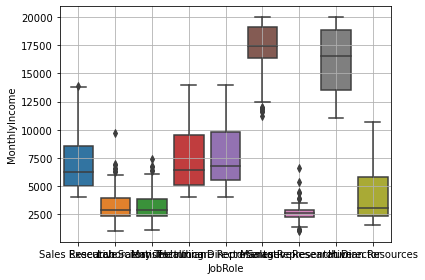

In [109]:
sns.boxplot(y=data["MonthlyIncome"], x=data["JobRole"])
plt.grid(True, alpha=1)
plt.tight_layout()
plt.show()

Managers and Research directors earn a relatively large sum. Intuitively, the attrition must have an inverse relationship with the monthly income parameter. 
Research Scientist, Lab. Technicians and Sales Representatives positions are not well paid. Such factors would lead to attrition in these departments.

In [110]:
# Check numeric variables
numeric_data=data.select_dtypes(include=['int64'])

In [111]:
def outlier_summary(data):
    print(f'Count of outliers:')
    outlier_var = 0
    for val in data.columns:
        Q1,Q3 = np.percentile(data[val].sort_values(), [25,75])
        IQR = Q3 - Q1
        min_ = Q1 - (1.5 * IQR)
        max_ = Q3 + (1.5 * IQR)

        tagging = data[val].apply(lambda x: 1 if (x < min_ or x > max_) else 0)
        count = tagging[tagging == 1].sum()
        if count > 0: outlier_var = outlier_var + 1
        print(f'  {val} -- Count: {count} Percentage: {int(round(count/data.shape[0]*100, 0))}%')
    print(f'Total number of variables with outliers: {outlier_var}')
    
outlier_summary(numeric_data)

Count of outliers:
  Age -- Count: 0 Percentage: 0%
  DailyRate -- Count: 0 Percentage: 0%
  DistanceFromHome -- Count: 0 Percentage: 0%
  Education -- Count: 0 Percentage: 0%
  EnvironmentSatisfaction -- Count: 0 Percentage: 0%
  HourlyRate -- Count: 0 Percentage: 0%
  JobInvolvement -- Count: 0 Percentage: 0%
  JobLevel -- Count: 0 Percentage: 0%
  JobSatisfaction -- Count: 0 Percentage: 0%
  MonthlyIncome -- Count: 114 Percentage: 8%
  MonthlyRate -- Count: 0 Percentage: 0%
  NumCompaniesWorked -- Count: 52 Percentage: 4%
  PercentSalaryHike -- Count: 0 Percentage: 0%
  PerformanceRating -- Count: 226 Percentage: 15%
  RelationshipSatisfaction -- Count: 0 Percentage: 0%
  StockOptionLevel -- Count: 85 Percentage: 6%
  TotalWorkingYears -- Count: 63 Percentage: 4%
  TrainingTimesLastYear -- Count: 238 Percentage: 16%
  WorkLifeBalance -- Count: 0 Percentage: 0%
  YearsAtCompany -- Count: 104 Percentage: 7%
  YearsInCurrentRole -- Count: 21 Percentage: 1%
  YearsSinceLastPromotion -- 

In [112]:
# get categorical variables
data.select_dtypes(include=['object'])


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [113]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [114]:
corr=data.corr()

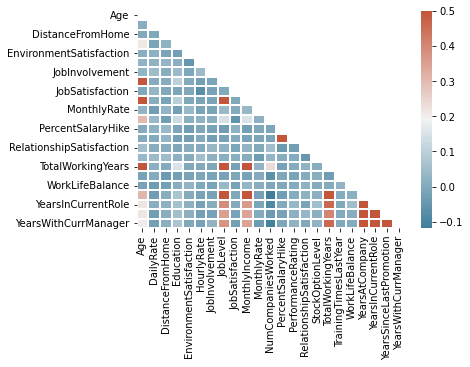

In [115]:
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, mask=mask, vmax=.5, linewidths=.2, )
plt.show()

In [116]:
# label encode the target variable
le = LabelEncoder()
y = pd.Series(le.fit_transform(data.Attrition))

In [118]:
label_summary = pd.DataFrame(zip(y, data.Attrition), columns = ['label_encode', 'Attrition'])\
    .groupby(['label_encode', 'Attrition']).size().to_frame('count').reset_index()
label_summary['%'] = round(label_summary['count']/label_summary['count'].sum()*100, 1)
label_summary

,label_encode,Attrition,count,%
0,0,No,1233,83.9
1,1,Yes,237,16.1


In [120]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Attrition', axis = 1), y, test_size = 0.2,
                                                    random_state = 778, shuffle = True, stratify = y)

# check distribution
pd.DataFrame({'Count - Train': y_train.value_counts(), '% - Train': round(y_train.value_counts(1)*100, 1),
              'Count - Test': y_test.value_counts(), '% - Test': round(y_test.value_counts(1)*100, 1)})

,Count - Train,% - Train,Count - Test,% - Test
0,986,83.8,247,84.0
1,190,16.2,47,16.0


In [121]:
from sklearn.compose import ColumnTransformer

In [122]:
nominal = X_train.select_dtypes(include=['object']).columns
ohe = ColumnTransformer([('encoder', OneHotEncoder(), nominal)], remainder='passthrough')

In [123]:
ohe.fit(X_train)
X_train_new = ohe.transform(X_train)
X_test_new = ohe.transform(X_test)

In [140]:
models = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression()]
models_name = [ 'Decision Tree', 'Random Forest', 'Logistic Regression']

for i in range(0, len(models)):
    cv_results = cross_validate(models[i], X_train_new, y_train,
                            cv=StratifiedKFold(n_splits= 5, shuffle=True, random_state=3),
                            scoring = ['f1_macro', 'accuracy'])
    accuracy = round(cv_results['test_accuracy'].mean(), 2)
    f1_score = round(cv_results['test_f1_macro'].mean(), 2)
    print(f'Model: {models_name[i]} - Accuracy: {accuracy} - F1 Score: {f1_score}')


Model: Decision Tree - Accuracy: 0.77 - F1 Score: 0.61
Model: Random Forest - Accuracy: 0.86 - F1 Score: 0.61
Model: Logistic Regression - Accuracy: 0.84 - F1 Score: 0.5
